In [24]:
import pandas as pd


In [19]:
df = pd.read_csv("data/archive-2/Child 1 Genome.csv",low_memory=False)
df1 = pd.read_csv("data/archive-2/Child 2 Genome.csv",low_memory=False)
df2 = pd.read_csv("data/archive-2/Child 3 Genome.csv",low_memory=False)

df3 = pd.read_csv("data/archive-2/Father Genome.csv",low_memory=False)
df4 = pd.read_csv("data/archive-2/Mother Genome.csv",low_memory=False)

In [26]:
# Importar librerías para análisis y visualización
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilos para visualizaciones
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [27]:
# Crear diccionario con todos los genomas
genomes = {
    'Child 1': df,
    'Child 2': df1,
    'Child 3': df2,
    'Father': df3,
    'Mother': df4
}

# Información básica de cada dataset
for name, dataset in genomes.items():
    print(f"\n{'='*60}")
    print(f"DATASET: {name}")
    print(f"{'='*60}")
    print(f"Dimensiones: {dataset.shape[0]} filas x {dataset.shape[1]} columnas")
    print(f"\nValores nulos por columna:")
    print(dataset.isnull().sum())


DATASET: Child 1
Dimensiones: 601802 filas x 4 columnas

Columnas: ['# rsid', 'chromosome', 'position', 'genotype']

Primeras filas:


,# rsid,chromosome,position,genotype
0,rs12564807,1,734462,AA
1,rs3131972,1,752721,AG
2,rs148828841,1,760998,AC
3,rs12124819,1,776546,AG
4,rs115093905,1,787173,GG



Tipos de datos:
# rsid        object
chromosome    object
position       int64
genotype      object
dtype: object

Valores nulos por columna:
# rsid        0
chromosome    0
position      0
genotype      0
dtype: int64

DATASET: Child 2
Dimensiones: 631983 filas x 4 columnas

Columnas: ['# rsid', 'chromosome', 'position', 'genotype']

Primeras filas:
# rsid        0
chromosome    0
position      0
genotype      0
dtype: int64

DATASET: Child 2
Dimensiones: 631983 filas x 4 columnas

Columnas: ['# rsid', 'chromosome', 'position', 'genotype']

Primeras filas:


,# rsid,chromosome,position,genotype
0,rs548049170,1,69869,TT
1,rs9283150,1,565508,AA
2,rs116587930,1,727841,GG
3,rs3131972,1,752721,GG
4,rs12184325,1,754105,CC



Tipos de datos:
# rsid        object
chromosome    object
position       int64
genotype      object
dtype: object

Valores nulos por columna:
# rsid        0
chromosome    0
position      0
genotype      0
dtype: int64

DATASET: Child 3
Dimensiones: 631983 filas x 4 columnas

Columnas: ['# rsid', 'chromosome', 'position', 'genotype']

Primeras filas:


,# rsid,chromosome,position,genotype
0,rs548049170,1,69869,TT
1,rs9283150,1,565508,AA
2,rs116587930,1,727841,GG
3,rs3131972,1,752721,GG
4,rs12184325,1,754105,CC



Tipos de datos:
# rsid        object
chromosome    object
position       int64
genotype      object
dtype: object

Valores nulos por columna:
# rsid        0
chromosome    0
position      0
genotype      0
dtype: int64

DATASET: Father
Dimensiones: 601802 filas x 4 columnas

Columnas: ['# rsid', 'chromosome', 'position', 'genotype']

Primeras filas:
# rsid        0
chromosome    0
position      0
genotype      0
dtype: int64

DATASET: Father
Dimensiones: 601802 filas x 4 columnas

Columnas: ['# rsid', 'chromosome', 'position', 'genotype']

Primeras filas:


,# rsid,chromosome,position,genotype
0,rs12564807,1,734462,AA
1,rs3131972,1,752721,AG
2,rs148828841,1,760998,AC
3,rs12124819,1,776546,AA
4,rs115093905,1,787173,GG



Tipos de datos:
# rsid        object
chromosome    object
position       int64
genotype      object
dtype: object

Valores nulos por columna:
# rsid        0
chromosome    0
position      0
genotype      0
dtype: int64

DATASET: Mother
Dimensiones: 601802 filas x 4 columnas

Columnas: ['# rsid', 'chromosome', 'position', 'genotype']

Primeras filas:


,# rsid,chromosome,position,genotype
0,rs12564807,1,734462,AA
1,rs3131972,1,752721,GG
2,rs148828841,1,760998,CC
3,rs12124819,1,776546,AG
4,rs115093905,1,787173,GG



Tipos de datos:
# rsid        object
chromosome    object
position       int64
genotype      object
dtype: object

Valores nulos por columna:
# rsid        0
chromosome    0
position      0
genotype      0
dtype: int64
# rsid        0
chromosome    0
position      0
genotype      0
dtype: int64


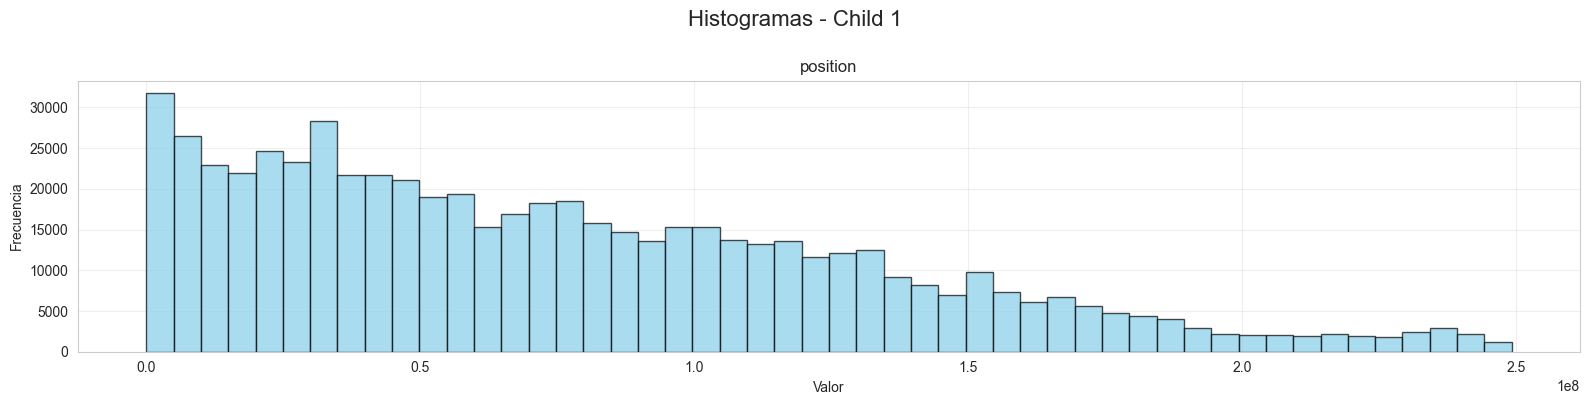

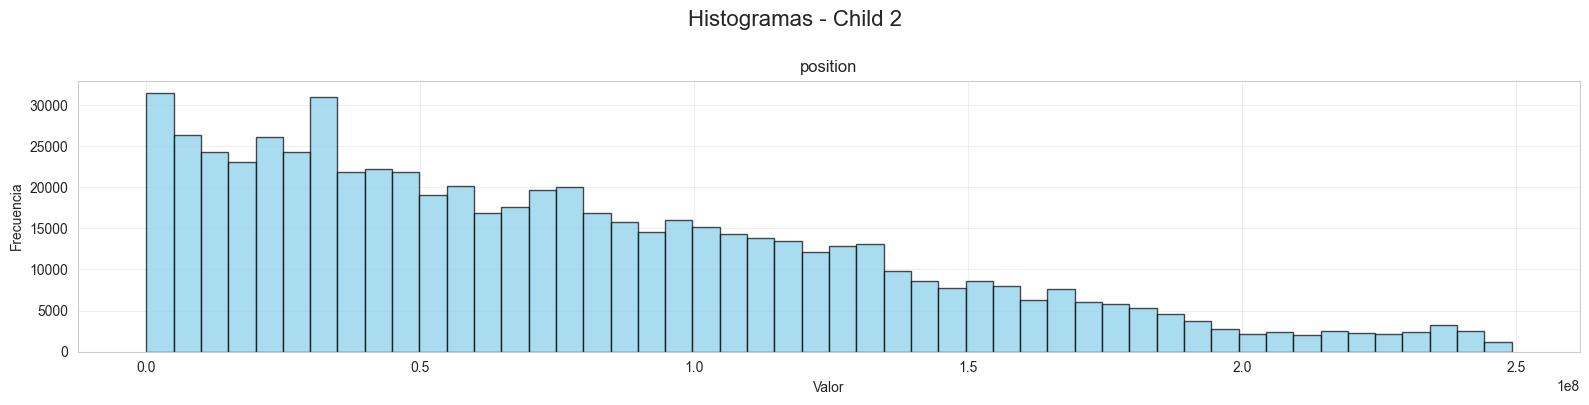

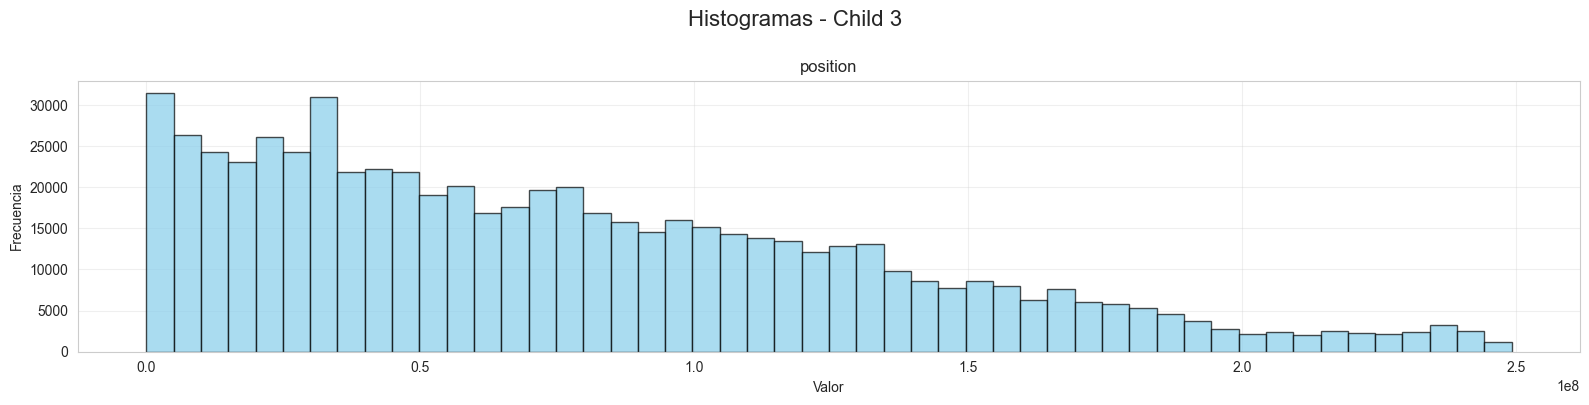

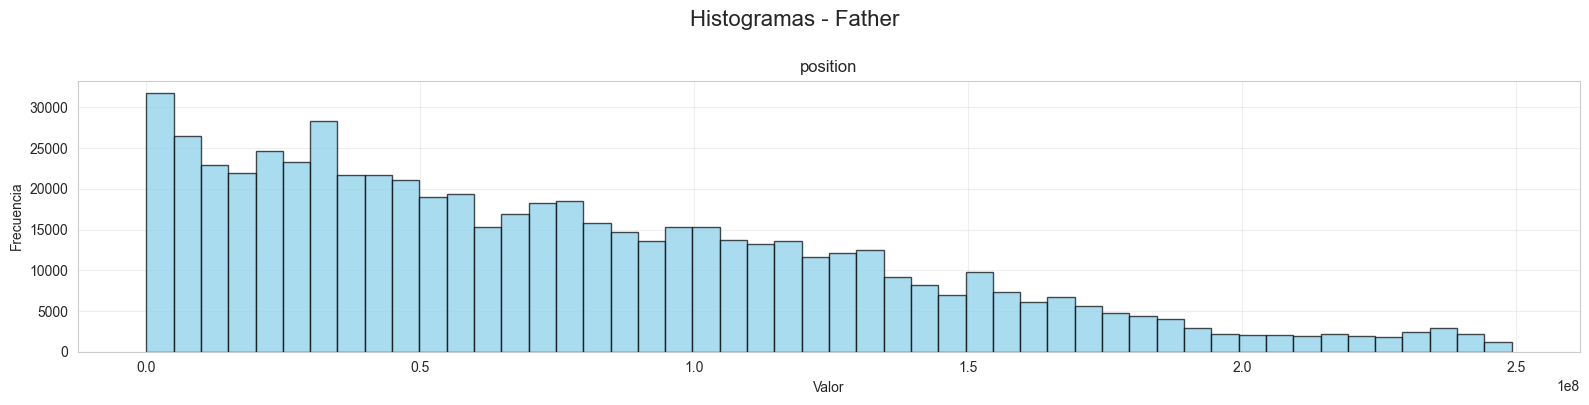

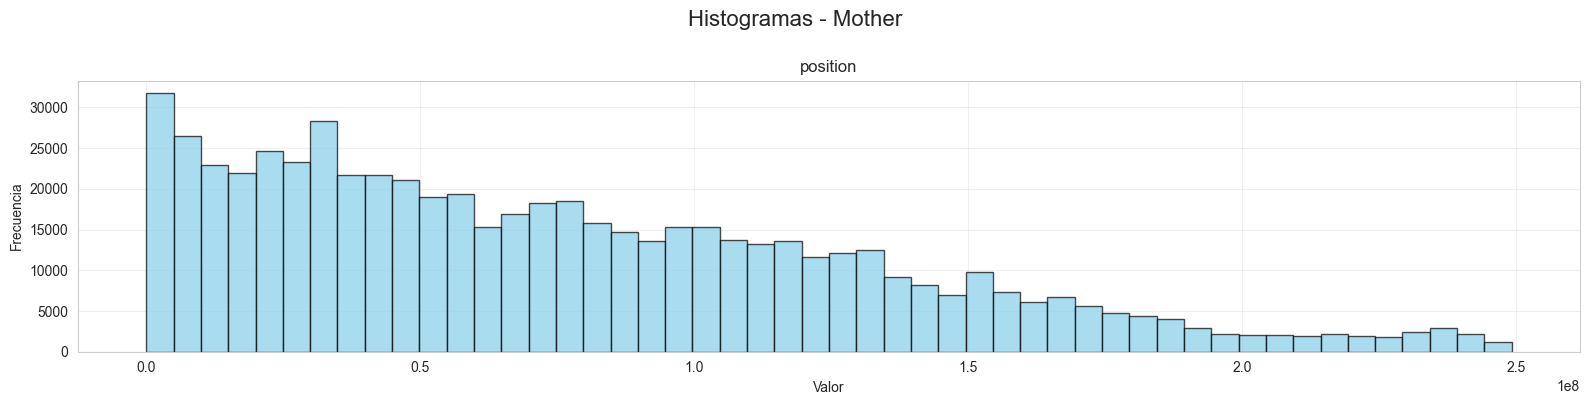

In [29]:
# Histogramas para variables numéricas de todos los genomas
for name, dataset in genomes.items():
    numeric_cols = dataset.select_dtypes(include=[np.number]).columns
    
    if len(numeric_cols) > 0:
        n_cols = min(len(numeric_cols), 4)
        n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
        fig.suptitle(f'Histogramas - {name}', fontsize=16, y=1.00)
        
        if n_rows * n_cols > 1:
            axes = axes.flatten()
        else:
            axes = [axes]
        
        for idx, col in enumerate(numeric_cols):
            if idx < len(axes):
                # Histograma con curva de densidad
                axes[idx].hist(dataset[col].dropna(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
                axes[idx].set_title(f'{col}', fontsize=12)
                axes[idx].set_xlabel('Valor')
                axes[idx].set_ylabel('Frecuencia')
                axes[idx].grid(alpha=0.3)
        
        # Ocultar ejes vacíos
        for idx in range(len(numeric_cols), len(axes)):
            axes[idx].set_visible(False)
        
        plt.tight_layout()
        plt.show()

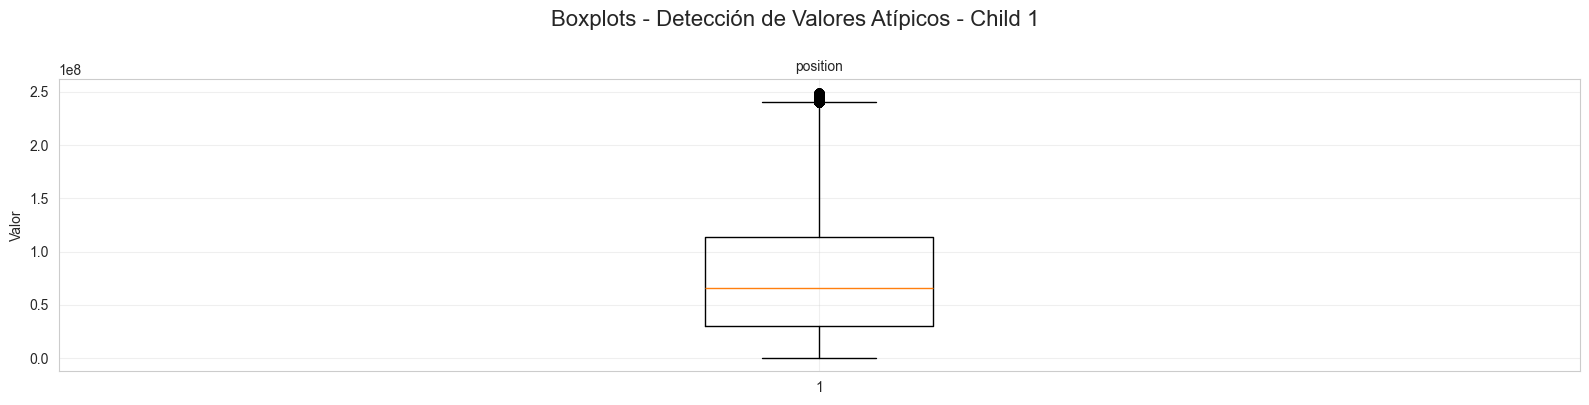

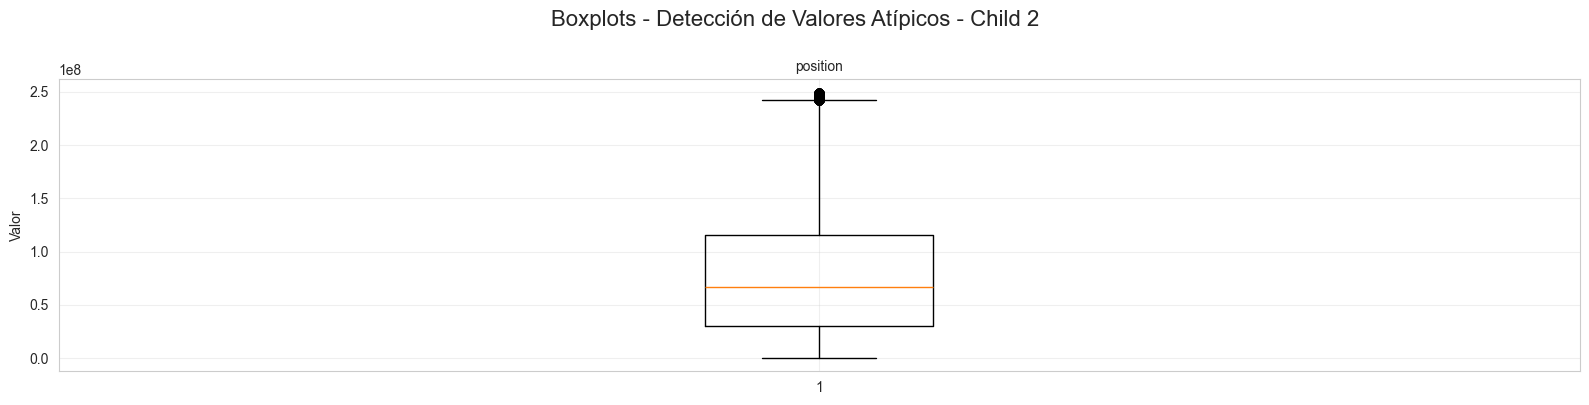

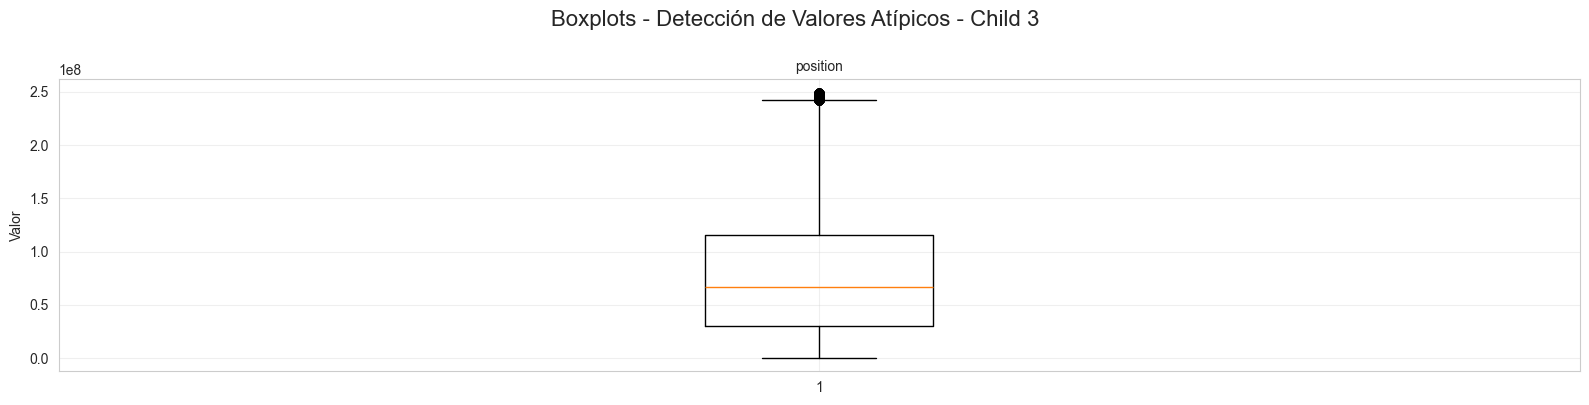

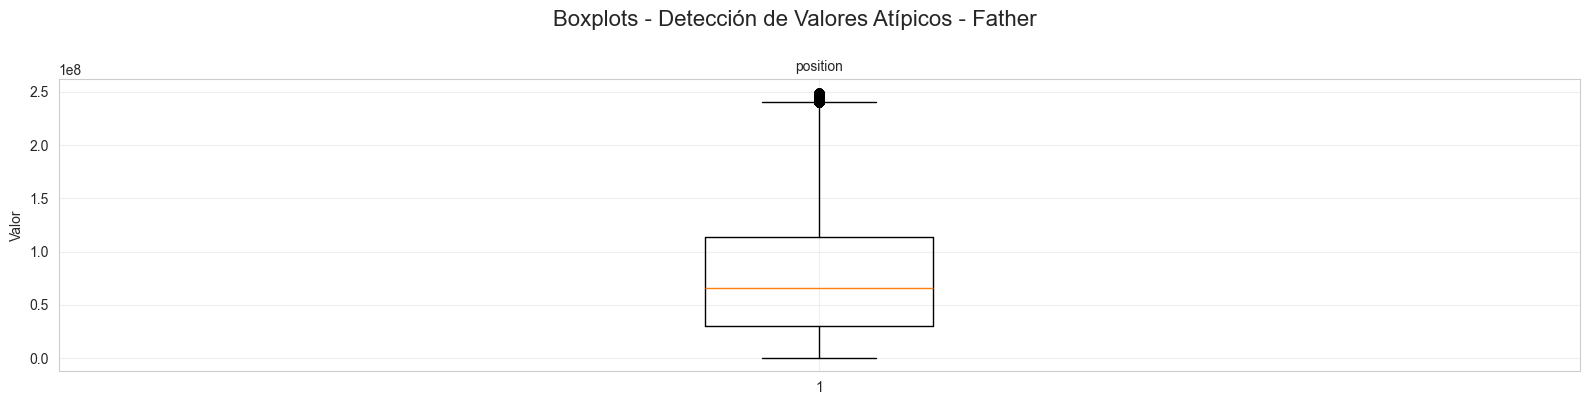

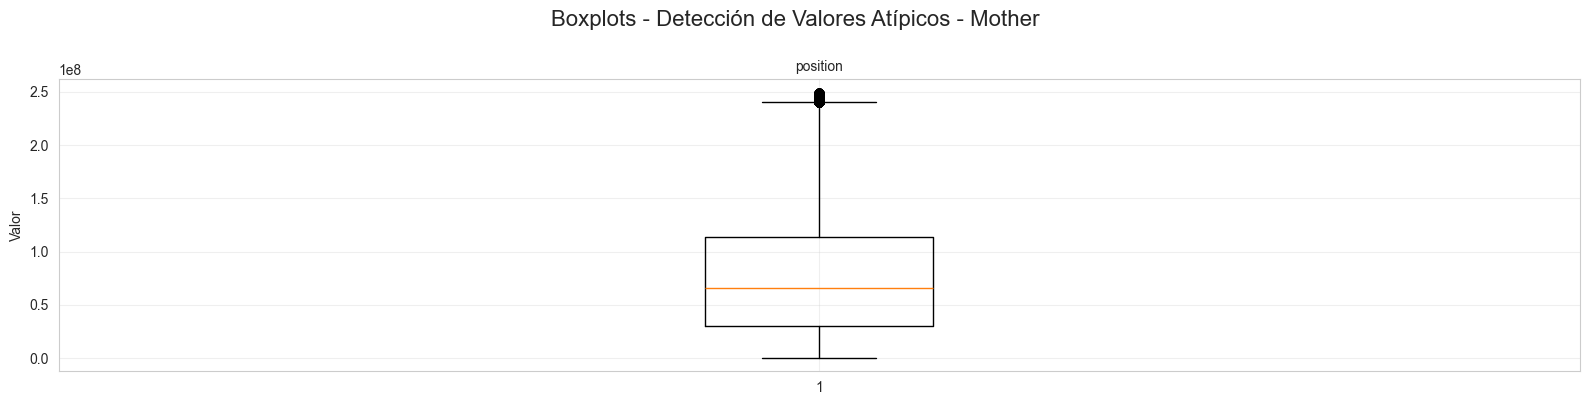

In [31]:
# Boxplots para detectar valores atípicos
for name, dataset in genomes.items():
    numeric_cols = dataset.select_dtypes(include=[np.number]).columns
    
    if len(numeric_cols) > 0:
        n_cols = min(len(numeric_cols), 4)
        n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
        fig.suptitle(f'Boxplots - Detección de Valores Atípicos - {name}', fontsize=16, y=1.00)
        
        if n_rows * n_cols > 1:
            axes = axes.flatten()
        else:
            axes = [axes]
        
        for idx, col in enumerate(numeric_cols):
            if idx < len(axes):
                data = dataset[col].dropna()
                axes[idx].boxplot(data, vert=True)
                axes[idx].set_title(f'{col}', fontsize=10)
                axes[idx].set_ylabel('Valor')
                axes[idx].grid(alpha=0.3)
        
        # Ocultar ejes vacíos
        for idx in range(len(numeric_cols), len(axes)):
            axes[idx].set_visible(False)
        
        plt.tight_layout()
        plt.show()

<Axes: xlabel='genotype'>

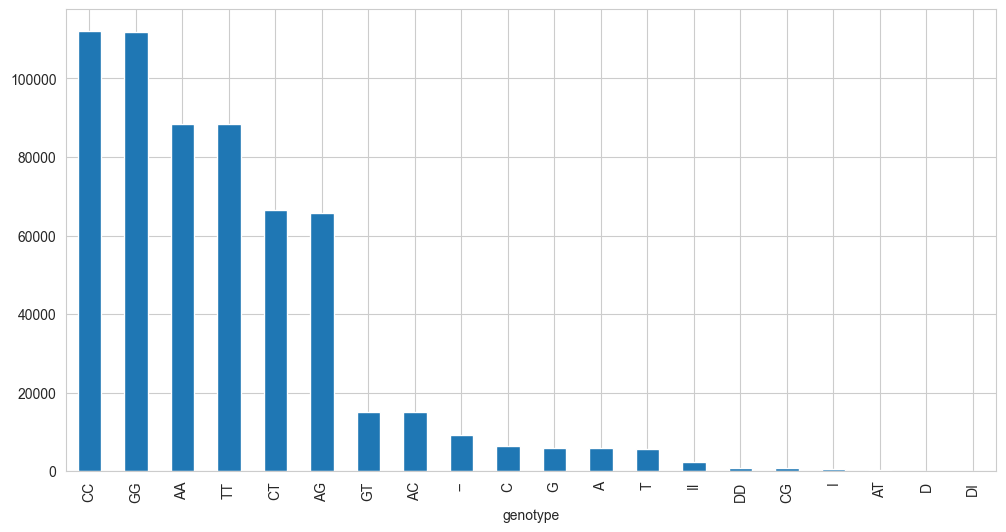

In [62]:
df['genotype'].value_counts().plot(kind='bar')


<Axes: xlabel='genotype'>

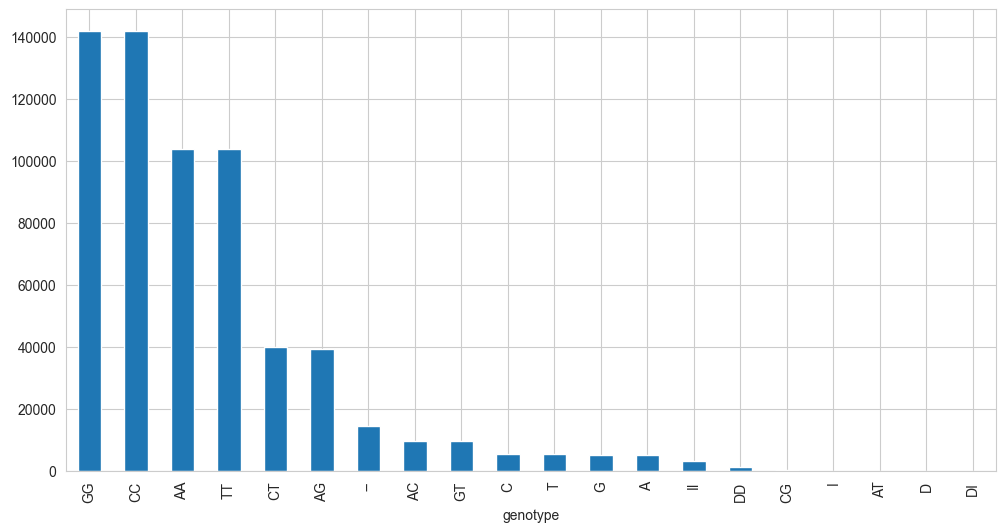

In [63]:
df1['genotype'].value_counts().plot(kind='bar')


<Axes: xlabel='genotype'>

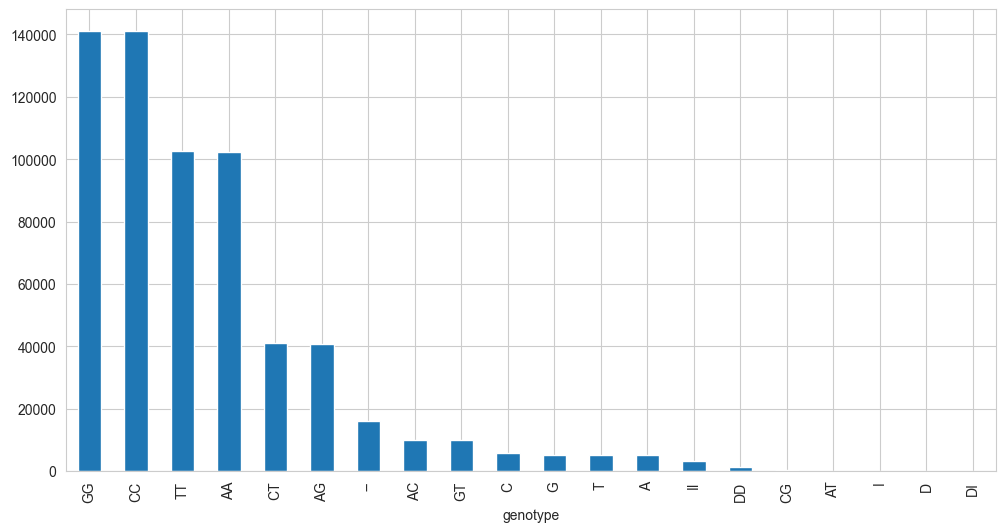

In [64]:
df2['genotype'].value_counts().plot(kind='bar')

<Axes: xlabel='genotype'>

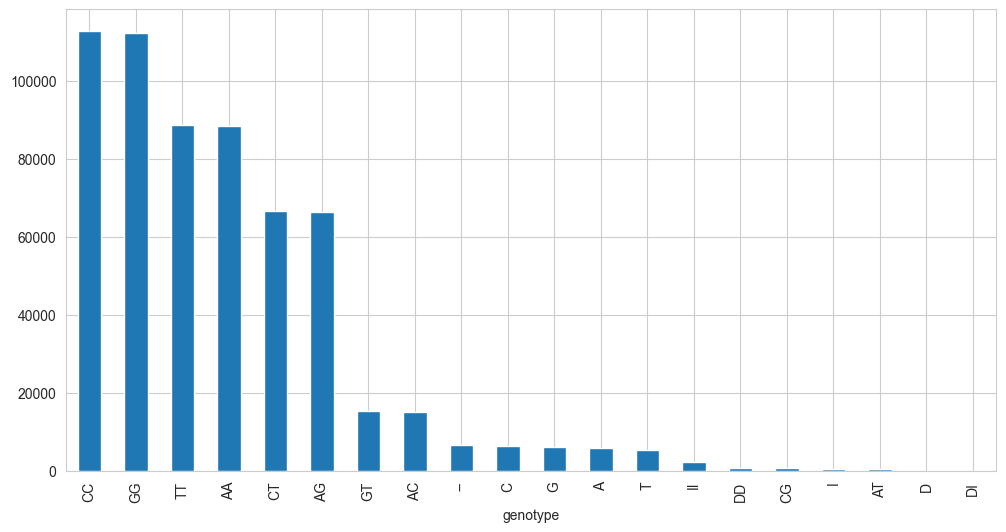

In [65]:
df3['genotype'].value_counts().plot(kind='bar')

<Axes: xlabel='genotype'>

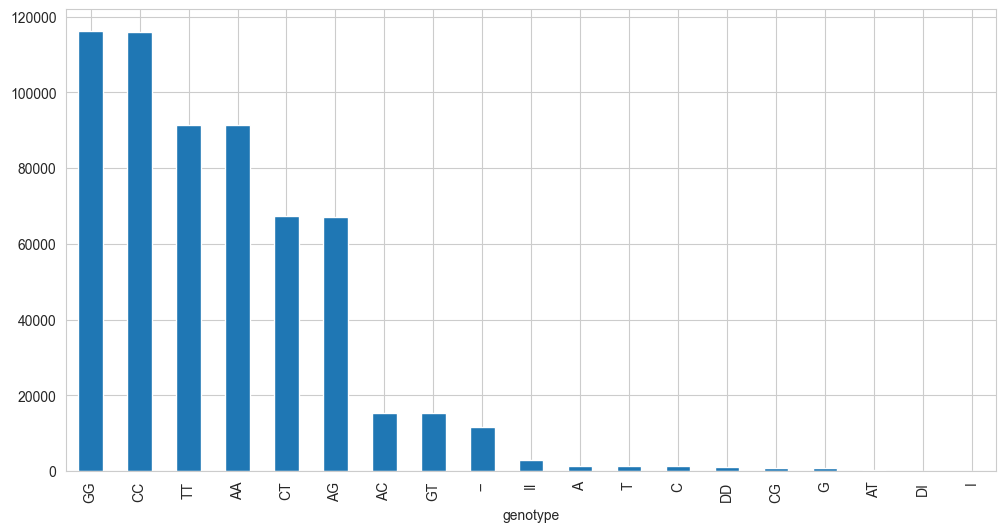

In [66]:
df4['genotype'].value_counts().plot(kind='bar')

# ANÁLISIS DE HERENCIA GENÉTICA
## Relación entre genomas de hijos y padres

Vamos a analizar:
1. Similitud genética entre cada hijo y sus padres
2. Herencia de variantes genéticas
3. Patrones de herencia mendeliana

In [67]:
# Primero, exploremos las columnas disponibles en los datasets
print("Columnas en el dataset Child 1:")
print(df.columns.tolist())
print(f"\nNúmero de columnas: {len(df.columns)}")
print(f"\nPrimeras filas:")
print(df.head())

Columnas en el dataset Child 1:
['# rsid', 'chromosome', 'position', 'genotype']

Número de columnas: 4

Primeras filas:
        # rsid chromosome  position genotype
0   rs12564807          1    734462       AA
1    rs3131972          1    752721       AG
2  rs148828841          1    760998       AC
3   rs12124819          1    776546       AG
4  rs115093905          1    787173       GG


## 1. Análisis de Similitud Genética

Calculamos qué porcentaje de variantes genéticas comparten los hijos con cada padre.

In [68]:
# Función para calcular similitud entre dos genomas
def calculate_similarity(child_df, parent_df):
    """
    Calcula la similitud genética entre hijo y padre basada en:
    1. SNPs compartidos (mismo rsid y posición)
    2. Genotipos idénticos
    3. Genotipos parcialmente compatibles (un alelo en común)
    """
    # Merge por rsid y posición para encontrar SNPs comunes
    merged = pd.merge(child_df, parent_df, on=['# rsid', 'chromosome', 'position'], 
                      suffixes=('_child', '_parent'))
    
    total_snps = len(merged)
    
    # Genotipos idénticos
    identical = (merged['genotype_child'] == merged['genotype_parent']).sum()
    
    # Genotipos parcialmente compatibles (al menos un alelo en común)
    # Por ejemplo: hijo AG con padre AA (A en común)
    partial_match = 0
    for idx, row in merged.iterrows():
        child_gt = set(row['genotype_child'])
        parent_gt = set(row['genotype_parent'])
        if len(child_gt.intersection(parent_gt)) > 0 and row['genotype_child'] != row['genotype_parent']:
            partial_match += 1
    
    return {
        'total_snps': total_snps,
        'identical_genotypes': identical,
        'partial_match': partial_match,
        'pct_identical': (identical / total_snps * 100) if total_snps > 0 else 0,
        'pct_compatible': ((identical + partial_match) / total_snps * 100) if total_snps > 0 else 0
    }

# Calcular similitud para cada hijo con cada padre
children_data = [('Child 1', df), ('Child 2', df1), ('Child 3', df2)]
parents_data = [('Father', df3), ('Mother', df4)]

results = []

for child_name, child_df in children_data:
    for parent_name, parent_df in parents_data:
        sim = calculate_similarity(child_df, parent_df)
        results.append({
            'Child': child_name,
            'Parent': parent_name,
            'Total SNPs Comunes': sim['total_snps'],
            'Genotipos Idénticos': sim['identical_genotypes'],
            'Compatibles Parciales': sim['partial_match'],
            '% Idénticos': round(sim['pct_identical'], 2),
            '% Compatibles': round(sim['pct_compatible'], 2)
        })

similarity_df = pd.DataFrame(results)
print(similarity_df.to_string(index=False))

  Child Parent  Total SNPs Comunes  Genotipos Idénticos  Compatibles Parciales  % Idénticos  % Compatibles
Child 1 Father              601802               426892                 163911        70.94          98.17
Child 1 Mother              601802               407760                 181879        67.76          97.98
Child 2 Father              116199                78929                  34219        67.93          97.37
Child 2 Mother              116199                76103                  37058        65.49          97.39
Child 3 Father              116199                78933                  34313        67.93          97.46
Child 3 Mother              116199                76107                  37124        65.50          97.45


## 2. Visualización de Similitud Genética

Graficamos los resultados para ver claramente la relación de cada hijo con sus padres.

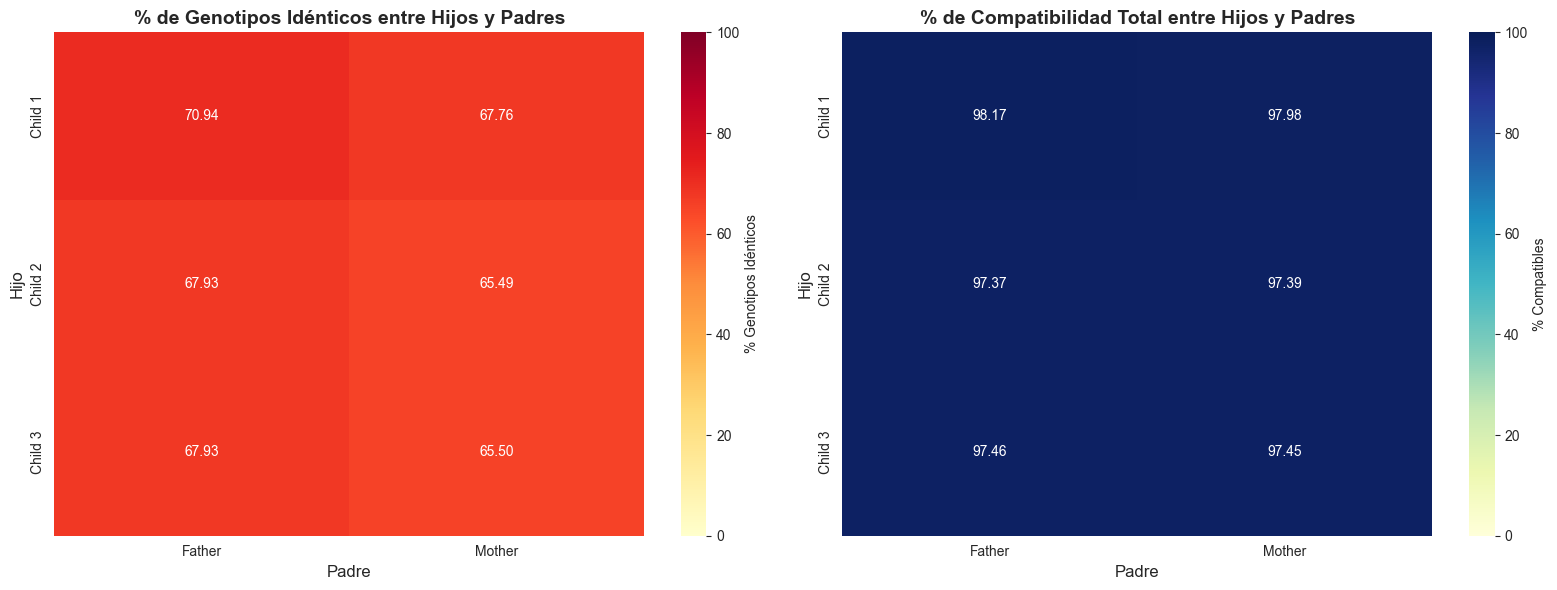

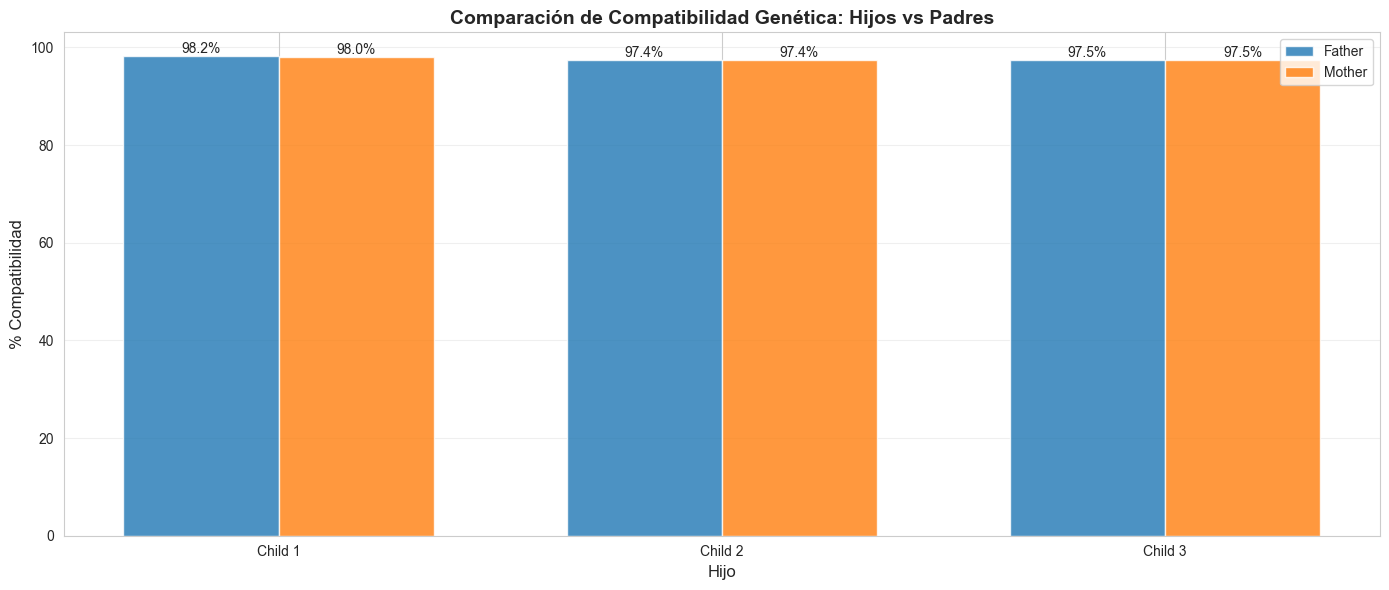

In [69]:
# Visualización de similitud genética
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Genotipos Idénticos
pivot_identical = similarity_df.pivot(index='Child', columns='Parent', values='% Idénticos')
sns.heatmap(pivot_identical, annot=True, fmt='.2f', cmap='YlOrRd', ax=ax1, 
            cbar_kws={'label': '% Genotipos Idénticos'}, vmin=0, vmax=100)
ax1.set_title('% de Genotipos Idénticos entre Hijos y Padres', fontsize=14, fontweight='bold')
ax1.set_ylabel('Hijo', fontsize=12)
ax1.set_xlabel('Padre', fontsize=12)

# Gráfico 2: Compatibilidad Total (idénticos + parciales)
pivot_compatible = similarity_df.pivot(index='Child', columns='Parent', values='% Compatibles')
sns.heatmap(pivot_compatible, annot=True, fmt='.2f', cmap='YlGnBu', ax=ax2,
            cbar_kws={'label': '% Compatibles'}, vmin=0, vmax=100)
ax2.set_title('% de Compatibilidad Total entre Hijos y Padres', fontsize=14, fontweight='bold')
ax2.set_ylabel('Hijo', fontsize=12)
ax2.set_xlabel('Padre', fontsize=12)

plt.tight_layout()
plt.show()

# Gráfico de barras comparativo
fig, ax = plt.subplots(figsize=(14, 6))
x = np.arange(len(similarity_df['Child'].unique()))
width = 0.35

for i, parent in enumerate(['Father', 'Mother']):
    parent_data = similarity_df[similarity_df['Parent'] == parent]
    offset = width * (i - 0.5)
    bars = ax.bar(x + offset, parent_data['% Compatibles'], width, 
                   label=parent, alpha=0.8)
    
    # Añadir valores en las barras
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Hijo', fontsize=12)
ax.set_ylabel('% Compatibilidad', fontsize=12)
ax.set_title('Comparación de Compatibilidad Genética: Hijos vs Padres', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(similarity_df['Child'].unique())
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 3. Análisis de Herencia por Cromosoma

Analizamos cómo se distribuye la herencia genética a través de los diferentes cromosomas.

In [70]:
# Análisis de herencia por cromosoma
def analyze_inheritance_by_chromosome(child_df, father_df, mother_df, child_name):
    """
    Analiza la herencia genética por cromosoma
    """
    results = []
    
    # Obtener cromosomas únicos
    chromosomes = sorted(child_df['chromosome'].unique())
    
    for chrom in chromosomes:
        # Filtrar por cromosoma
        child_chrom = child_df[child_df['chromosome'] == chrom]
        father_chrom = father_df[father_df['chromosome'] == chrom]
        mother_chrom = mother_df[mother_df['chromosome'] == chrom]
        
        # Merge con padre
        merged_father = pd.merge(child_chrom, father_chrom, 
                                on=['# rsid', 'chromosome', 'position'], 
                                suffixes=('_child', '_father'))
        identical_father = (merged_father['genotype_child'] == merged_father['genotype_father']).sum()
        
        # Merge con madre
        merged_mother = pd.merge(child_chrom, mother_chrom, 
                                on=['# rsid', 'chromosome', 'position'], 
                                suffixes=('_child', '_mother'))
        identical_mother = (merged_mother['genotype_child'] == merged_mother['genotype_mother']).sum()
        
        total_snps = len(child_chrom)
        
        results.append({
            'Chromosome': chrom,
            'Total SNPs': total_snps,
            'From Father (%)': round((identical_father / len(merged_father) * 100) if len(merged_father) > 0 else 0, 2),
            'From Mother (%)': round((identical_mother / len(merged_mother) * 100) if len(merged_mother) > 0 else 0, 2)
        })
    
    return pd.DataFrame(results)

# Analizar cada hijo
print("="*80)
print("ANÁLISIS DE HERENCIA POR CROMOSOMA")
print("="*80)

for child_name, child_df in children_data:
    print(f"\n{child_name}:")
    inheritance_chrom = analyze_inheritance_by_chromosome(child_df, df3, df4, child_name)
    print(inheritance_chrom.to_string(index=False))
    print()

ANÁLISIS DE HERENCIA POR CROMOSOMA

Child 1:
Chromosome  Total SNPs  From Father (%)  From Mother (%)
         1       46656            71.58            70.92
        10       29211            69.68            69.46
        11       29320            70.98            71.23
        12       28450            72.25            70.07
        13       21652            71.30            70.04
        14       18695            69.24            69.90
        15       18281            69.80            68.71
        16       19198            71.50            71.09
        17       18710            74.16            72.57
        18       16490            71.29            68.63
        19       12989            74.17            73.32
         2       46127            69.16            69.81
        20       14494            69.93            69.29
        21        8461            68.76            67.98
        22        9096            70.56            71.08
         3       38516            69.81    

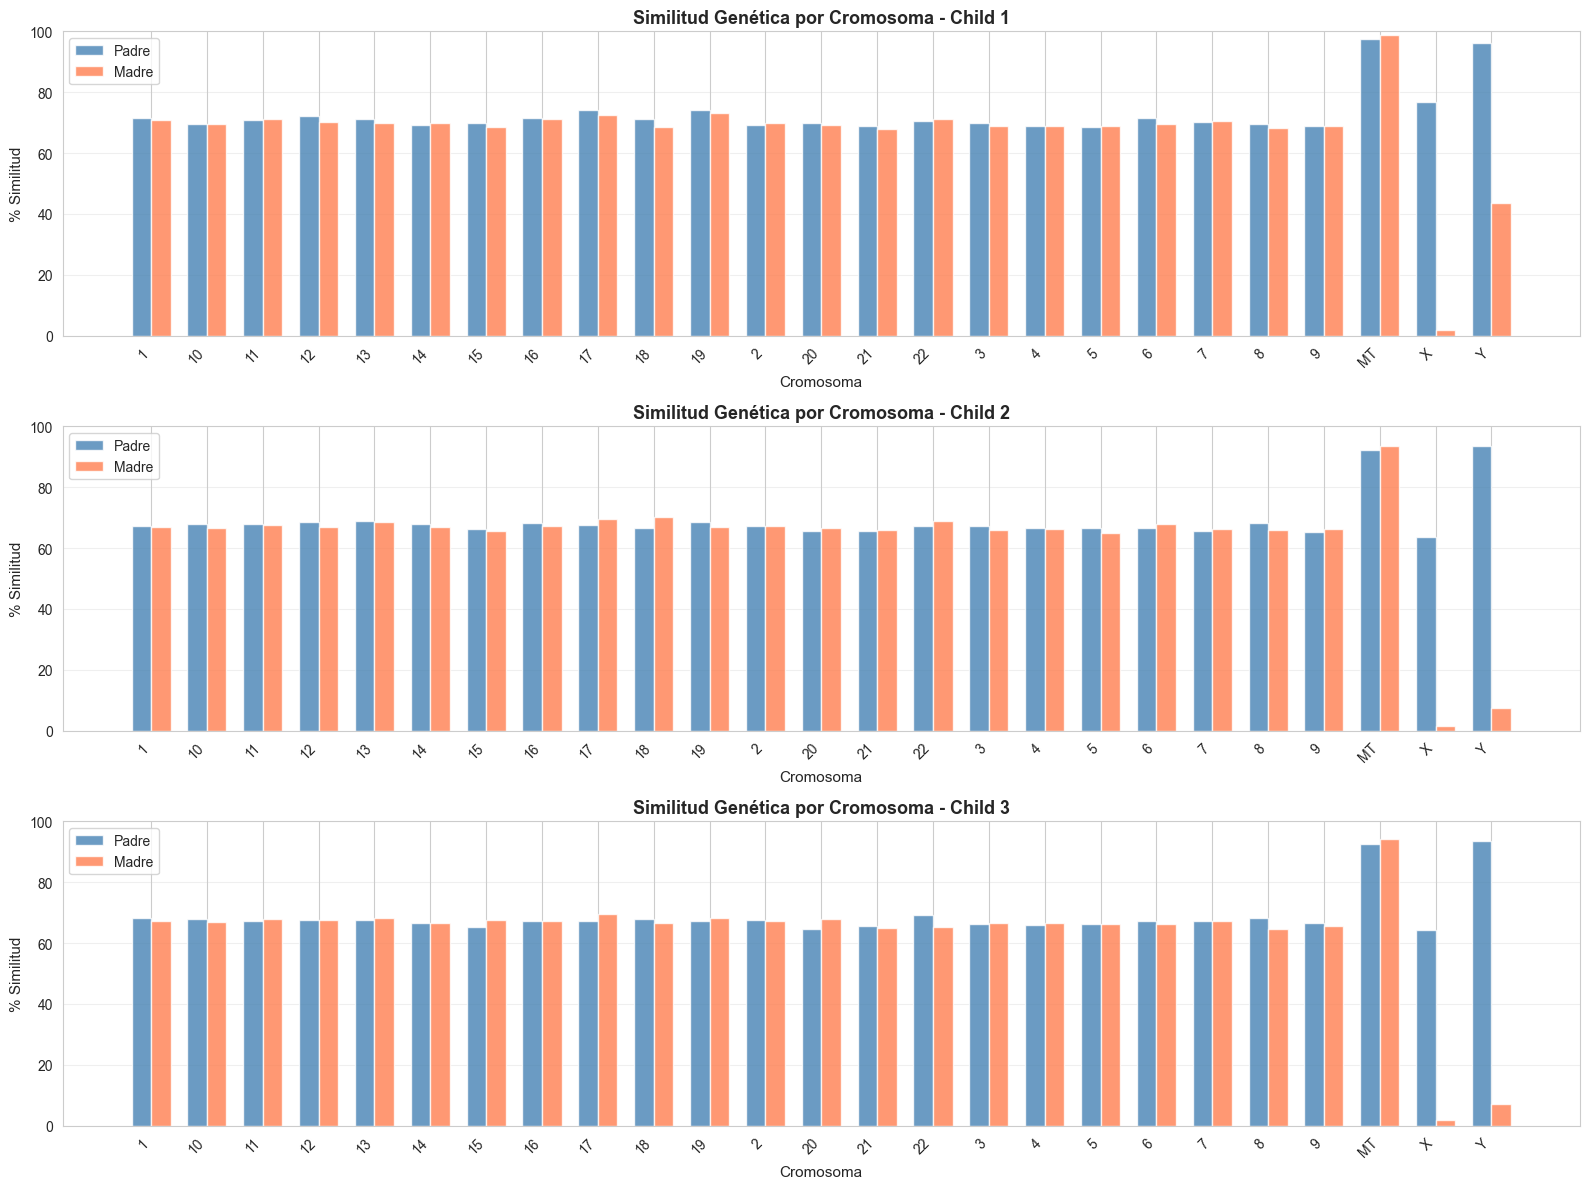

In [71]:
# Visualización de herencia por cromosoma
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

for idx, (child_name, child_df) in enumerate(children_data):
    inheritance_chrom = analyze_inheritance_by_chromosome(child_df, df3, df4, child_name)
    
    x = np.arange(len(inheritance_chrom))
    width = 0.35
    
    bars1 = axes[idx].bar(x - width/2, inheritance_chrom['From Father (%)'], 
                          width, label='Padre', color='steelblue', alpha=0.8)
    bars2 = axes[idx].bar(x + width/2, inheritance_chrom['From Mother (%)'], 
                          width, label='Madre', color='coral', alpha=0.8)
    
    axes[idx].set_xlabel('Cromosoma', fontsize=11)
    axes[idx].set_ylabel('% Similitud', fontsize=11)
    axes[idx].set_title(f'Similitud Genética por Cromosoma - {child_name}', 
                        fontsize=13, fontweight='bold')
    axes[idx].set_xticks(x)
    axes[idx].set_xticklabels(inheritance_chrom['Chromosome'], rotation=45, ha='right')
    axes[idx].legend()
    axes[idx].grid(axis='y', alpha=0.3)
    axes[idx].set_ylim(0, 100)

plt.tight_layout()
plt.show()

## 4. Análisis de Patrones de Herencia Mendeliana

Verificamos si los genotipos de los hijos siguen las leyes de Mendel basándonos en los genotipos de los padres.

In [72]:
# Función para validar herencia mendeliana
def validate_mendelian_inheritance(child_gt, father_gt, mother_gt):
    """
    Verifica si el genotipo del hijo es compatible con la herencia mendeliana
    dados los genotipos de los padres.
    
    Retorna:
    - 'Compatible': El genotipo del hijo puede provenir de los alelos de los padres
    - 'No Compatible': El genotipo del hijo no puede explicarse por los padres
    """
    # Convertir genotipos a sets de alelos
    child_alleles = set(child_gt)
    father_alleles = set(father_gt)
    mother_alleles = set(mother_gt)
    
    # El hijo debe tener alelos que puedan provenir de ambos padres
    # Cada alelo del hijo debe estar presente en al menos uno de los padres
    for allele in child_alleles:
        if allele not in father_alleles and allele not in mother_alleles:
            return 'No Compatible'
    
    return 'Compatible'

# Análisis de herencia mendeliana para cada hijo
def analyze_mendelian_patterns(child_df, father_df, mother_df, child_name):
    """
    Analiza qué porcentaje de SNPs siguen patrones de herencia mendeliana
    """
    # Merge de los tres genomas
    merged = pd.merge(child_df, father_df, on=['# rsid', 'chromosome', 'position'], 
                     suffixes=('_child', '_father'))
    merged = pd.merge(merged, mother_df, on=['# rsid', 'chromosome', 'position'])
    merged.rename(columns={'genotype': 'genotype_mother'}, inplace=True)
    
    # Validar cada SNP
    merged['mendelian_status'] = merged.apply(
        lambda row: validate_mendelian_inheritance(
            row['genotype_child'], 
            row['genotype_father'], 
            row['genotype_mother']
        ), axis=1
    )
    
    compatible = (merged['mendelian_status'] == 'Compatible').sum()
    total = len(merged)
    
    return {
        'child': child_name,
        'total_snps': total,
        'compatible': compatible,
        'not_compatible': total - compatible,
        'pct_compatible': round((compatible / total * 100) if total > 0 else 0, 2)
    }

# Analizar cada hijo
mendelian_results = []
print("="*80)
print("ANÁLISIS DE HERENCIA MENDELIANA")
print("="*80)
print("\nValidando si los genotipos de los hijos son compatibles con los de sus padres...\n")

for child_name, child_df in children_data:
    result = analyze_mendelian_patterns(child_df, df3, df4, child_name)
    mendelian_results.append(result)
    print(f"{child_name}:")
    print(f"  Total SNPs analizados: {result['total_snps']:,}")
    print(f"  SNPs compatibles: {result['compatible']:,} ({result['pct_compatible']}%)")
    print(f"  SNPs no compatibles: {result['not_compatible']:,} ({100 - result['pct_compatible']:.2f}%)")
    print()

mendelian_df = pd.DataFrame(mendelian_results)

ANÁLISIS DE HERENCIA MENDELIANA

Validando si los genotipos de los hijos son compatibles con los de sus padres...

Child 1:
  Total SNPs analizados: 601,802
  SNPs compatibles: 596,351 (99.09%)
  SNPs no compatibles: 5,451 (0.91%)

Child 2:
  Total SNPs analizados: 116,199
  SNPs compatibles: 114,566 (98.59%)
  SNPs no compatibles: 1,633 (1.41%)

Child 3:
  Total SNPs analizados: 116,199
  SNPs compatibles: 114,599 (98.62%)
  SNPs no compatibles: 1,600 (1.38%)



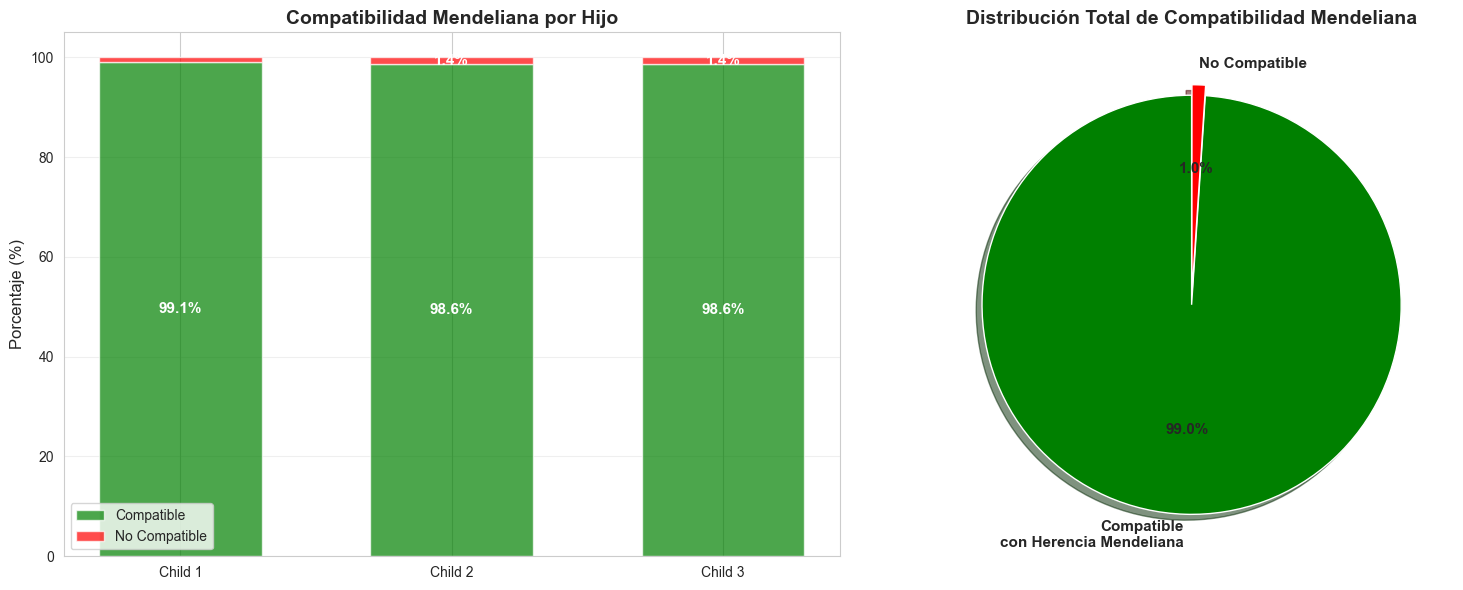


Total de SNPs analizados en todos los hijos: 834,200
Total compatibles: 825,516 (98.96%)
Total no compatibles: 8,684 (1.04%)


In [73]:
# Visualización de compatibilidad mendeliana
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras
children_names = [r['child'] for r in mendelian_results]
compatible_pcts = [r['pct_compatible'] for r in mendelian_results]
not_compatible_pcts = [100 - r['pct_compatible'] for r in mendelian_results]

x = np.arange(len(children_names))
width = 0.6

bars1 = ax1.bar(x, compatible_pcts, width, label='Compatible', color='green', alpha=0.7)
bars2 = ax1.bar(x, not_compatible_pcts, width, bottom=compatible_pcts, 
                label='No Compatible', color='red', alpha=0.7)

ax1.set_ylabel('Porcentaje (%)', fontsize=12)
ax1.set_title('Compatibilidad Mendeliana por Hijo', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(children_names)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for i, (comp, not_comp) in enumerate(zip(compatible_pcts, not_compatible_pcts)):
    ax1.text(i, comp/2, f'{comp:.1f}%', ha='center', va='center', 
             fontweight='bold', color='white', fontsize=11)
    if not_comp > 1:
        ax1.text(i, comp + not_comp/2, f'{not_comp:.1f}%', ha='center', va='center', 
                 fontweight='bold', color='white', fontsize=11)

# Gráfico de pastel para el conjunto
total_compatible = sum(r['compatible'] for r in mendelian_results)
total_not_compatible = sum(r['not_compatible'] for r in mendelian_results)
total_all = total_compatible + total_not_compatible

sizes = [total_compatible, total_not_compatible]
labels = ['Compatible\ncon Herencia Mendeliana', 'No Compatible']
colors = ['green', 'red']
explode = (0.05, 0)

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
ax2.set_title('Distribución Total de Compatibilidad Mendeliana', 
              fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nTotal de SNPs analizados en todos los hijos: {total_all:,}")
print(f"Total compatibles: {total_compatible:,} ({total_compatible/total_all*100:.2f}%)")
print(f"Total no compatibles: {total_not_compatible:,} ({total_not_compatible/total_all*100:.2f}%)")

## 6. Análisis de Cromosomas Sexuales

Identificamos el sexo biológico de cada individuo mediante el análisis de los cromosomas X e Y.

**Características biológicas:**
- **Mujeres (XX)**: Tienen dos cromosomas X, NO tienen cromosoma Y
- **Hombres (XY)**: Tienen un cromosoma X y un cromosoma Y

In [75]:
# Análisis de cromosomas sexuales
def analyze_sex_chromosomes(genome_df, name):
    """
    Analiza los cromosomas sexuales (X, Y) para determinar el sexo biológico
    """
    # Filtrar cromosomas sexuales
    chr_x = genome_df[genome_df['chromosome'] == 'X']
    chr_y = genome_df[genome_df['chromosome'] == 'Y']
    
    # Contar SNPs en cada cromosoma
    x_snps = len(chr_x)
    y_snps = len(chr_y)
    
    # Determinar sexo basado en presencia de cromosoma Y
    # Si tiene SNPs en cromosoma Y -> Hombre (XY)
    # Si NO tiene SNPs en cromosoma Y -> Mujer (XX)
    if y_snps > 0:
        sex = "Hombre (XY)"
        confidence = "Alta"
    else:
        sex = "Mujer (XX)"
        confidence = "Alta"
    
    return {
        'Persona': name,
        'SNPs en X': x_snps,
        'SNPs en Y': y_snps,
        'Sexo Biológico': sex,
        'Confianza': confidence
    }

# Analizar todos los genomas
print("="*80)
print("ANÁLISIS DE CROMOSOMAS SEXUALES - DETERMINACIÓN DE SEXO BIOLÓGICO")
print("="*80)
print()

sex_results = []

# Analizar cada genoma
all_genomes = [
    ('Child 1', df),
    ('Child 2', df1),
    ('Child 3', df2),
    ('Father', df3),
    ('Mother', df4)
]

for name, genome_df in all_genomes:
    result = analyze_sex_chromosomes(genome_df, name)
    sex_results.append(result)

sex_df = pd.DataFrame(sex_results)
print(sex_df.to_string(index=False))

print("\n" + "="*80)
print("INTERPRETACIÓN:")
print("="*80)
for result in sex_results:
    print(f"\n{result['Persona']}:")
    print(f"  • Cromosoma X: {result['SNPs en X']:,} SNPs detectados")
    print(f"  • Cromosoma Y: {result['SNPs en Y']:,} SNPs detectados")
    print(f"  • Sexo biológico: {result['Sexo Biológico']}")
    
    if 'Mother' in result['Persona']:
        if result['SNPs en Y'] == 0:
            print(f"  ✓ CONFIRMADO: Es mujer (ausencia de cromosoma Y)")
        else:
            print(f"  ⚠ ATENCIÓN: Tiene cromosoma Y (inconsistente con 'Mother')")
    elif 'Father' in result['Persona']:
        if result['SNPs en Y'] > 0:
            print(f"  ✓ CONFIRMADO: Es hombre (presencia de cromosoma Y)")
        else:
            print(f"  ⚠ ATENCIÓN: No tiene cromosoma Y (inconsistente con 'Father')")

ANÁLISIS DE CROMOSOMAS SEXUALES - DETERMINACIÓN DE SEXO BIOLÓGICO

Persona  SNPs en X  SNPs en Y Sexo Biológico Confianza
Child 1      19478       2302    Hombre (XY)      Alta
Child 2      16143       3501    Hombre (XY)      Alta
Child 3      16143       3501    Hombre (XY)      Alta
 Father      19478       2302    Hombre (XY)      Alta
 Mother      19478       2302    Hombre (XY)      Alta

INTERPRETACIÓN:

Child 1:
  • Cromosoma X: 19,478 SNPs detectados
  • Cromosoma Y: 2,302 SNPs detectados
  • Sexo biológico: Hombre (XY)

Child 2:
  • Cromosoma X: 16,143 SNPs detectados
  • Cromosoma Y: 3,501 SNPs detectados
  • Sexo biológico: Hombre (XY)

Child 3:
  • Cromosoma X: 16,143 SNPs detectados
  • Cromosoma Y: 3,501 SNPs detectados
  • Sexo biológico: Hombre (XY)

Father:
  • Cromosoma X: 19,478 SNPs detectados
  • Cromosoma Y: 2,302 SNPs detectados
  • Sexo biológico: Hombre (XY)
  ✓ CONFIRMADO: Es hombre (presencia de cromosoma Y)

Mother:
  • Cromosoma X: 19,478 SNPs detectados
 

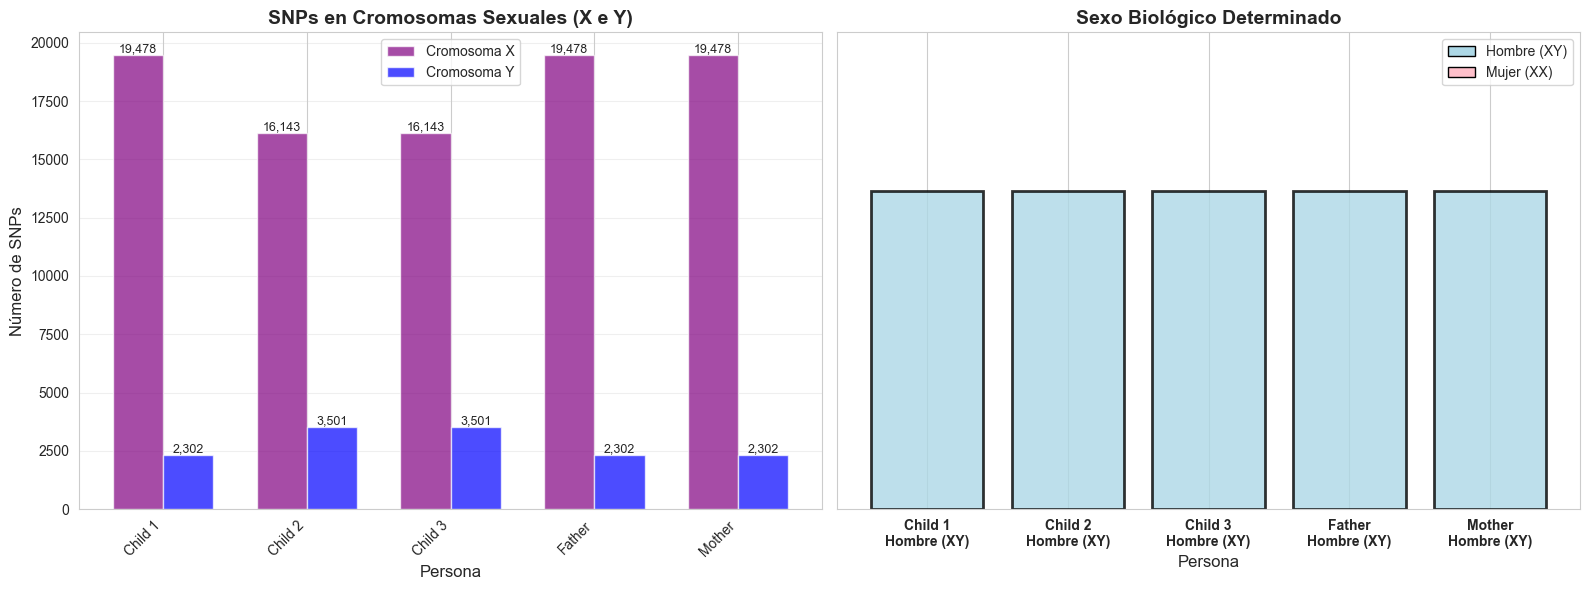

In [76]:
# Visualización de cromosomas sexuales
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Comparación de SNPs en cromosomas X e Y
names = sex_df['Persona']
x_snps = sex_df['SNPs en X']
y_snps = sex_df['SNPs en Y']

x_pos = np.arange(len(names))
width = 0.35

bars1 = ax1.bar(x_pos - width/2, x_snps, width, label='Cromosoma X', color='purple', alpha=0.7)
bars2 = ax1.bar(x_pos + width/2, y_snps, width, label='Cromosoma Y', color='blue', alpha=0.7)

ax1.set_xlabel('Persona', fontsize=12)
ax1.set_ylabel('Número de SNPs', fontsize=12)
ax1.set_title('SNPs en Cromosomas Sexuales (X e Y)', fontsize=14, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(names, rotation=45, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for i, (x_val, y_val) in enumerate(zip(x_snps, y_snps)):
    if x_val > 0:
        ax1.text(i - width/2, x_val, f'{x_val:,}', ha='center', va='bottom', fontsize=9)
    if y_val > 0:
        ax1.text(i + width/2, y_val, f'{y_val:,}', ha='center', va='bottom', fontsize=9)

# Gráfico 2: Identificación visual del sexo
colors_sex = ['lightblue' if 'XY' in sex else 'pink' for sex in sex_df['Sexo Biológico']]
labels_sex = [f"{name}\n{sex}" for name, sex in zip(sex_df['Persona'], sex_df['Sexo Biológico'])]

ax2.bar(range(len(names)), [1]*len(names), color=colors_sex, alpha=0.8, edgecolor='black', linewidth=2)
ax2.set_ylim(0, 1.5)
ax2.set_xticks(range(len(names)))
ax2.set_xticklabels(labels_sex, rotation=0, fontsize=10, fontweight='bold')
ax2.set_yticks([])
ax2.set_title('Sexo Biológico Determinado', fontsize=14, fontweight='bold')
ax2.set_xlabel('Persona', fontsize=12)

# Añadir leyenda
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='lightblue', edgecolor='black', label='Hombre (XY)'),
    Patch(facecolor='pink', edgecolor='black', label='Mujer (XX)')
]
ax2.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

In [77]:
# Análisis adicional: Genotipos en cromosoma X
print("="*80)
print("ANÁLISIS DETALLADO DE GENOTIPOS EN CROMOSOMA X")
print("="*80)
print()

for name, genome_df in all_genomes:
    chr_x = genome_df[genome_df['chromosome'] == 'X']
    
    if len(chr_x) > 0:
        # Analizar genotipos
        genotypes = chr_x['genotype'].value_counts().head(10)
        
        # Contar homocigotos vs heterocigotos
        homozygous = chr_x[chr_x['genotype'].str.len() == 2].apply(
            lambda row: row['genotype'][0] == row['genotype'][1] if len(row['genotype']) == 2 else False, axis=1
        ).sum() if len(chr_x) > 0 else 0
        
        heterozygous = chr_x[chr_x['genotype'].str.len() == 2].apply(
            lambda row: row['genotype'][0] != row['genotype'][1] if len(row['genotype']) == 2 else False, axis=1
        ).sum() if len(chr_x) > 0 else 0
        
        total_analyzed = homozygous + heterozygous
        
        print(f"\n{name}:")
        print(f"  Total SNPs en X: {len(chr_x):,}")
        
        if total_analyzed > 0:
            print(f"  Homocigotos: {homozygous:,} ({homozygous/total_analyzed*100:.2f}%)")
            print(f"  Heterocigotos: {heterozygous:,} ({heterozygous/total_analyzed*100:.2f}%)")
            
            # Interpretación
            hetero_ratio = heterozygous / total_analyzed if total_analyzed > 0 else 0
            if 'Mother' in name or 'Child' in name:
                if hetero_ratio > 0.2:  # Mujeres esperan tener heterocigotos en X
                    print(f"  ✓ Patrón consistente con mujer (XX): presencia significativa de heterocigotos")
                else:
                    print(f"  → Bajo porcentaje de heterocigotos")
            elif 'Father' in name:
                if hetero_ratio < 0.1:  # Hombres tienen un solo X, pocos heterocigotos esperados
                    print(f"  ✓ Patrón consistente con hombre (XY): predominio de homocigotos")
                else:
                    print(f"  → Alto porcentaje de heterocigotos")
        
        print(f"\n  Top 5 genotipos más comunes en X:")
        for gt, count in genotypes.head(5).items():
            print(f"    {gt}: {count:,} ({count/len(chr_x)*100:.2f}%)")

ANÁLISIS DETALLADO DE GENOTIPOS EN CROMOSOMA X


Child 1:
  Total SNPs en X: 19,478
  Homocigotos: 865 (86.50%)
  Heterocigotos: 135 (13.50%)
  → Bajo porcentaje de heterocigotos

  Top 5 genotipos más comunes en X:
    G: 4,960 (25.46%)
    C: 4,833 (24.81%)
    A: 4,114 (21.12%)
    T: 3,896 (20.00%)
    --: 673 (3.46%)

Child 2:
  Total SNPs en X: 16,143
  Homocigotos: 900 (86.62%)
  Heterocigotos: 139 (13.38%)
  → Bajo porcentaje de heterocigotos

  Top 5 genotipos más comunes en X:
    G: 3,898 (24.15%)
    C: 3,883 (24.05%)
    T: 3,558 (22.04%)
    A: 3,497 (21.66%)
    --: 522 (3.23%)

Child 3:
  Total SNPs en X: 16,143
  Homocigotos: 1,338 (90.10%)
  Heterocigotos: 147 (9.90%)
  → Bajo porcentaje de heterocigotos

  Top 5 genotipos más comunes en X:
    C: 3,871 (23.98%)
    G: 3,836 (23.76%)
    T: 3,361 (20.82%)
    A: 3,331 (20.63%)
    --: 969 (6.00%)

Father:
  Total SNPs en X: 19,478
  Homocigotos: 717 (86.91%)
  Heterocigotos: 108 (13.09%)
  → Alto porcentaje de heteroc

In [69]:
from family_generator import FamilyGenerator
genome_paths = {
        'father': 'data/archive-2/Father Genome.csv',
        'mother': 'data/archive-2/Mother Genome.csv',
        'children': [
            'data/archive-2/Child 1 Genome.csv',
            'data/archive-2/Child 2 Genome.csv',
            'data/archive-2/Child 3 Genome.csv'
        ]
    }
    
family_gen = FamilyGenerator(genome_paths=genome_paths)

Analizando genoma del padre desde: data/archive-2/Father Genome.csv


/Users/alberto/Desktop/PGVD/producer/family/father.py:26: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  self.genome_df = pd.read_csv(self.genome_file)


Father: Analizando 601,802 SNPs
Analizando genoma de la madre desde: data/archive-2/Mother Genome.csv
Analizando genoma de la madre desde: data/archive-2/Mother Genome.csv


/Users/alberto/Desktop/PGVD/producer/family/mother.py:26: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  self.genome_df = pd.read_csv(self.genome_file)


Father: Analizando 601,802 SNPs

📊 ANALIZANDO GENOMAS DE LOS 3 HIJOS

Analizando Child 1: data/archive-2/Child 1 Genome.csv

📊 ANALIZANDO GENOMAS DE LOS 3 HIJOS

Analizando Child 1: data/archive-2/Child 1 Genome.csv


/Users/alberto/Desktop/PGVD/producer/family/childs.py:34: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(genome_file)


   Total SNPs: 601,802
    Genotipos únicos: 20
      Top 5: ['CC', 'GG', 'AA', 'TT', 'CT']
   ✅ Cromosomas: 25
   ✅ Rangos de posición calculados para 25 cromosomas

Analizando Child 2: data/archive-2/Child 2 Genome.csv
   ✅ Rangos de posición calculados para 25 cromosomas

Analizando Child 2: data/archive-2/Child 2 Genome.csv


/Users/alberto/Desktop/PGVD/producer/family/childs.py:34: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(genome_file)


   Total SNPs: 631,983
    Genotipos únicos: 20
      Top 5: ['GG', 'CC', 'AA', 'TT', 'CT']
   ✅ Cromosomas: 25
   ✅ Rangos de posición calculados para 25 cromosomas

Analizando Child 3: data/archive-2/Child 3 Genome.csv
   ✅ Rangos de posición calculados para 25 cromosomas

Analizando Child 3: data/archive-2/Child 3 Genome.csv


/Users/alberto/Desktop/PGVD/producer/family/childs.py:34: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(genome_file)


   Total SNPs: 631,983
    Genotipos únicos: 20
      Top 5: ['GG', 'CC', 'TT', 'AA', 'CT']
   ✅ Cromosomas: 25
   ✅ Rangos de posición calculados para 25 cromosomas

✅ ANÁLISIS COMPLETADO PARA LOS 3 HIJOS

✅ Generador de familias listo

   ✅ Rangos de posición calculados para 25 cromosomas

✅ ANÁLISIS COMPLETADO PARA LOS 3 HIJOS

✅ Generador de familias listo



In [70]:
# Generar 3 padres diferentes y comparar sus distribuciones
print("="*80)
print("🧪 PRUEBA DE VARIACIÓN ALEATORIA - GENERANDO 3 PADRES")
print("="*80)

# Reiniciar el generador para cada padre
fathers_data = []

for padre_num in range(1, 4):
    print(f"\n{'─'*80}")
    print(f"Generando Padre #{padre_num}...")
    print(f"{'─'*80}")
    
    # Crear un nuevo generador para este padre
    gen = family_gen.father_generator.generate(f"TEST_FAM_{padre_num}")
    
    # Extraer solo los primeros 10,000 SNPs para análisis rápido
    father_snps = []
    try:
            while True:
                item = next(gen)
                father_snps.append(item)
    except StopIteration:
        pass
    
    fathers_data.append({
        'nombre': f'Padre {padre_num}',
        'snps': father_snps
    })
    
    print(f"✅ Padre #{padre_num}: {len(father_snps):,} SNPs extraídos para análisis")

print(f"\n{'='*80}")
print("✅ GENERACIÓN COMPLETADA - 3 Padres generados")
print(f"{'='*80}\n")

🧪 PRUEBA DE VARIACIÓN ALEATORIA - GENERANDO 3 PADRES

────────────────────────────────────────────────────────────────────────────────
Generando Padre #1...
────────────────────────────────────────────────────────────────────────────────
      🧬 Padre TEST_FAM_1_F: Iniciando generación de 601,802 SNPs
      📊 Padre: 100,000/601,802 SNPs (16.6%)
      📊 Padre: 100,000/601,802 SNPs (16.6%)
      📊 Padre: 200,000/601,802 SNPs (33.2%)
      📊 Padre: 200,000/601,802 SNPs (33.2%)
      📊 Padre: 300,000/601,802 SNPs (49.9%)
      📊 Padre: 300,000/601,802 SNPs (49.9%)
      📊 Padre: 400,000/601,802 SNPs (66.5%)
      📊 Padre: 400,000/601,802 SNPs (66.5%)
      📊 Padre: 500,000/601,802 SNPs (83.1%)
      📊 Padre: 500,000/601,802 SNPs (83.1%)
      📊 Padre: 600,000/601,802 SNPs (99.7%)
✅ Padre #1: 601,802 SNPs extraídos para análisis

────────────────────────────────────────────────────────────────────────────────
Generando Padre #2...
────────────────────────────────────────────────────────────

In [71]:
# Comparar las distribuciones de los 3 padres generados
print("="*80)
print("📊 COMPARACIÓN DE DISTRIBUCIONES ENTRE LOS 3 PADRES")
print("="*80)
import numpy as np
# Crear DataFrames para cada padre
comparison_data = []
o_m  = df3['position'].mean()
o_std = df3['position'].std()

chr_dist_o = df3['chromosome'].value_counts(normalize=True).sort_index()
gen_dist_o=df3['genotype'].value_counts(normalize=True).sort_index()

print("Origial")
print(f"Media:  {o_m:>15,.0f}")
print(f"STD:  {o_std:>15,.0f}")
for father in fathers_data:
    chromosomes = [snp['snp_data']['chromosome'] for snp in father['snps']]
    genotypes = [snp['snp_data']['genotype'] for snp in father['snps']]
    positions = [snp['snp_data']['position'] for snp in father['snps']]
    
    # Distribución de cromosomas
    chr_dist = pd.Series(chromosomes).value_counts(normalize=True).sort_index()
    
    # Distribución de genotipos (top 10)
    gen_dist = pd.Series(genotypes).value_counts(normalize=True).head(10)
    
    # Estadísticas de posiciones
    pos_stats = {
        'mean': np.mean(positions),
        'std': np.std(positions),
        'min': np.min(positions),
        'max': np.max(positions)
    }
    
    comparison_data.append({
        'padre': father['nombre'],
        'chr_dist': chr_dist,
        'gen_dist': gen_dist,
        'pos_stats': pos_stats,
        'chromosomes': chromosomes,
        'genotypes': genotypes,
        'positions': positions
    })

# Mostrar estadísticas de posiciones
print("\n📍 Estadísticas de POSICIONES:")
print("─"*80)

for data in comparison_data:
    print(f"\n{data['padre']}:")
    print(f"  Media:       {data['pos_stats']['mean']:>15,.0f}")
    print(f"  Desv. Est.:  {data['pos_stats']['std']:>15,.0f}")
    print(f"  Rango:       {data['pos_stats']['min']:>15,} - {data['pos_stats']['max']:,}")

# Comparar distribuciones de cromosomas
print("\n\n🧬 Comparación de CROMOSOMAS (primeros 5):")
print("─"*80)
print("Origial")
print(f"Cromosoma:  {chr_dist_o.head(5)}")
for data in comparison_data:
    print(f"\n{data['padre']}:")
    for chr_name, pct in data['chr_dist'].head(5).items():
        print(f"  Cromosoma {chr_name:>2}: {pct*100:>6.2f}%")

# Comparar distribuciones de genotipos
print("\n\n🔬 Comparación de GENOTIPOS (top 5):")
print("─"*80)
print("Origial")
print(f"GENOTIPOS:  {gen_dist_o.head(5)}")
for data in comparison_data:
    print(f"\n{data['padre']}:")
    for gt, pct in data['gen_dist'].head(5).items():
        print(f"  {gt}: {pct*100:>6.2f}%")

print("\n" + "="*80)

📊 COMPARACIÓN DE DISTRIBUCIONES ENTRE LOS 3 PADRES
Origial
Media:       76,382,310
STD:       56,988,227

📍 Estadísticas de POSICIONES:
────────────────────────────────────────────────────────────────────────────────

Padre 1:
  Media:            77,389,205
  Desv. Est.:       52,801,669
  Rango:                     3 - 249,218,992

Padre 2:
  Media:            77,421,859
  Desv. Est.:       52,893,027
  Rango:                     3 - 249,218,992

Padre 3:
  Media:            77,469,406
  Desv. Est.:       52,898,094
  Rango:                     3 - 249,218,992


🧬 Comparación de CROMOSOMAS (primeros 5):
────────────────────────────────────────────────────────────────────────────────
Origial
Cromosoma:  chromosome
1     0.077527
10    0.048539
11    0.048720
12    0.047275
13    0.035979
Name: proportion, dtype: float64

Padre 1:
  Cromosoma  1:   7.83%
  Cromosoma 10:   4.95%
  Cromosoma 11:   4.98%
  Cromosoma 12:   4.85%
  Cromosoma 13:   3.68%

Padre 2:
  Cromosoma  1:   7.89%
  Cr

/var/folders/0z/81q974151kg7hrf0756m6s940000gn/T/ipykernel_67592/606167451.py:77: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax6.boxplot(positions_data, labels=labels, patch_artist=True)


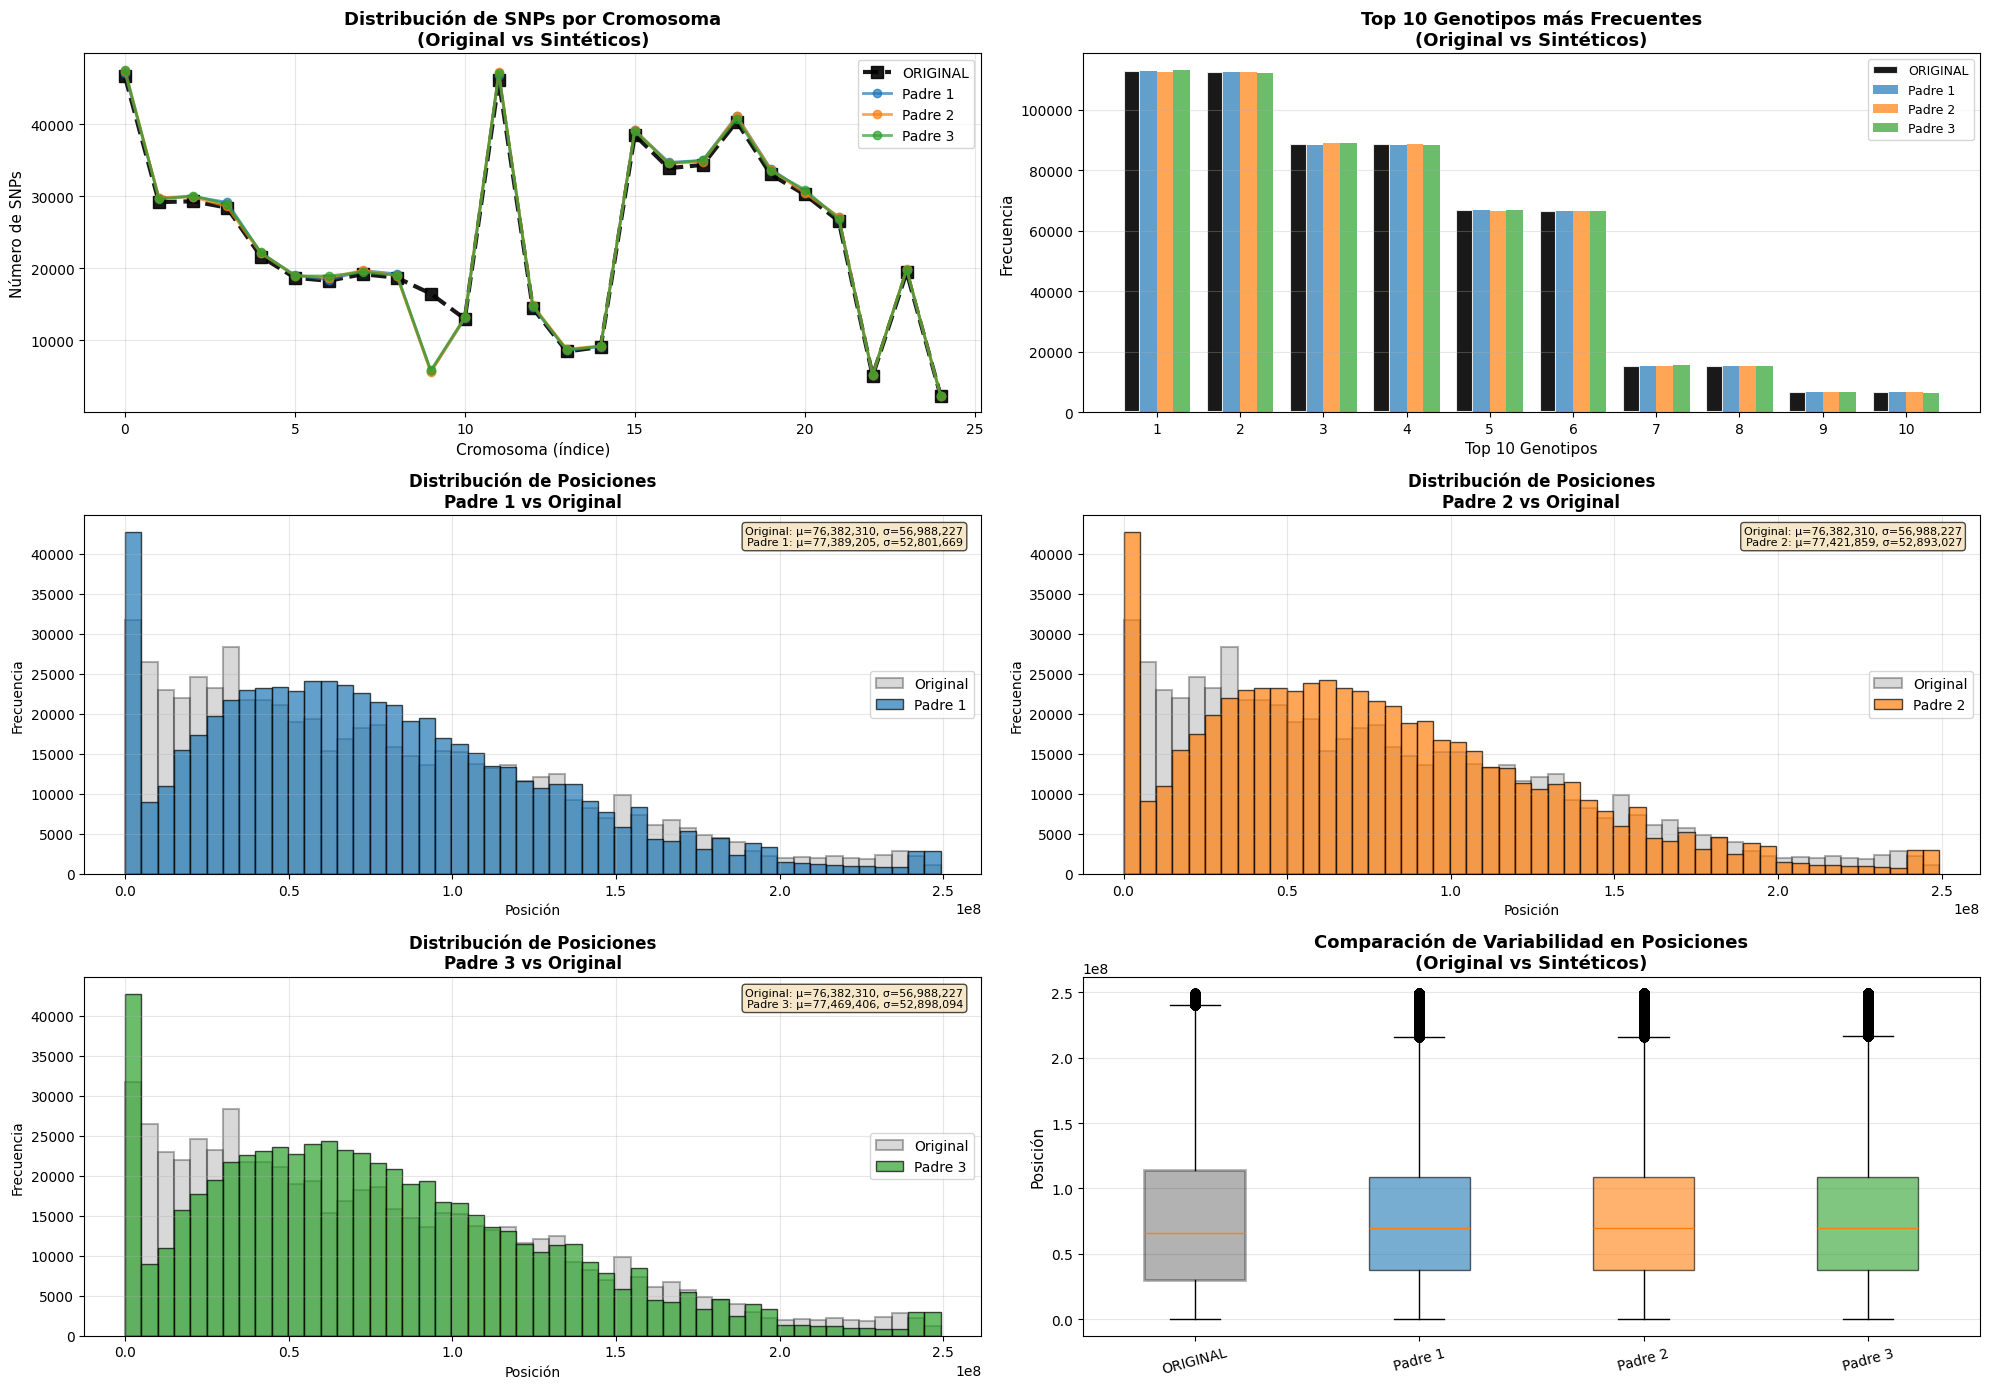

In [72]:
# Visualización de las diferencias entre los 3 padres SINTÉTICOS vs ORIGINAL
fig = plt.figure(figsize=(20, 14))

# Preparar datos del padre original
original_chromosomes = df3['chromosome'].tolist()
original_genotypes = df3['genotype'].tolist()
original_positions = df3['position'].tolist()

# 1. Distribución de cromosomas - COMPARACIÓN CON ORIGINAL
ax1 = plt.subplot(3, 2, 1)
# Padre Original
chr_counts_orig = pd.Series(original_chromosomes).value_counts().sort_index()
ax1.plot(range(len(chr_counts_orig)), chr_counts_orig.values, marker='s', label='ORIGINAL', 
         alpha=0.9, linewidth=3, color='black', markersize=8, linestyle='--')
# Padres Sintéticos
for idx, data in enumerate(comparison_data):
    chr_counts = pd.Series(data['chromosomes']).value_counts().sort_index()
    ax1.plot(range(len(chr_counts)), chr_counts.values, marker='o', label=data['padre'], 
             alpha=0.7, linewidth=2)
ax1.set_xlabel('Cromosoma (índice)', fontsize=11)
ax1.set_ylabel('Número de SNPs', fontsize=11)
ax1.set_title('Distribución de SNPs por Cromosoma\n(Original vs Sintéticos)', fontsize=13, fontweight='bold')
ax1.legend(loc='best')
ax1.grid(alpha=0.3)

# 2. Top 10 genotipos más comunes - COMPARACIÓN CON ORIGINAL
ax2 = plt.subplot(3, 2, 2)
x = np.arange(10)
width = 0.2

# Padre Original
gen_top10_orig = pd.Series(original_genotypes).value_counts().head(10)
ax2.bar(x - width*1.5, gen_top10_orig.values, width, label='ORIGINAL', alpha=0.9, 
        color='black', edgecolor='white', linewidth=1.5)

# Padres Sintéticos
for idx, data in enumerate(comparison_data):
    gen_top10 = pd.Series(data['genotypes']).value_counts().head(10)
    offset = width * (idx - 0.5)
    ax2.bar(x + offset, gen_top10.values, width, label=data['padre'], alpha=0.7)

ax2.set_xlabel('Top 10 Genotipos', fontsize=11)
ax2.set_ylabel('Frecuencia', fontsize=11)
ax2.set_title('Top 10 Genotipos más Frecuentes\n(Original vs Sintéticos)', fontsize=13, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(range(1, 11))
ax2.legend(loc='best', fontsize=9)
ax2.grid(axis='y', alpha=0.3)

# 3-5. Histogramas de posiciones (Sintéticos)
for idx, data in enumerate(comparison_data, start=3):
    ax = plt.subplot(3, 2, idx)
    # Original en fondo
    ax.hist(original_positions, bins=50, alpha=0.3, edgecolor='black', 
            color='gray', label='Original', linewidth=1.5)
    # Sintético encima
    ax.hist(data['positions'], bins=50, alpha=0.7, edgecolor='black', 
            color=f'C{idx-3}', label=data['padre'])
    ax.set_xlabel('Posición', fontsize=10)
    ax.set_ylabel('Frecuencia', fontsize=10)
    ax.set_title(f'Distribución de Posiciones\n{data["padre"]} vs Original', 
                 fontsize=12, fontweight='bold')
    ax.legend(loc='best')
    ax.grid(alpha=0.3)
    # Añadir estadísticas comparativas
    stats_text = f"Original: μ={o_m:,.0f}, σ={o_std:,.0f}\n"
    stats_text += f"{data['padre']}: μ={data['pos_stats']['mean']:,.0f}, σ={data['pos_stats']['std']:,.0f}"
    ax.text(0.98, 0.97, stats_text, 
            transform=ax.transAxes, fontsize=8, verticalalignment='top', 
            horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

# 6. Comparación de variabilidad (boxplot de posiciones) - CON ORIGINAL
ax6 = plt.subplot(3, 2, 6)
positions_data = [original_positions] + [data['positions'] for data in comparison_data]
labels = ['ORIGINAL'] + [data['padre'] for data in comparison_data]
bp = ax6.boxplot(positions_data, labels=labels, patch_artist=True)

# Colorear: Negro para original, colores para sintéticos
colors = ['black'] + ['C0', 'C1', 'C2']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6 if color != 'black' else 0.3)
    if color == 'black':
        patch.set_edgecolor('black')
        patch.set_linewidth(2)

ax6.set_ylabel('Posición', fontsize=11)
ax6.set_title('Comparación de Variabilidad en Posiciones\n(Original vs Sintéticos)', 
              fontsize=13, fontweight='bold')
ax6.grid(axis='y', alpha=0.3)
ax6.tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()
